In [ ]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
# display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m", "B11_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1290 1267 1264 1252
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1612 1575 1578 1531
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1524 1468 1525 1489
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1136 1137 1138 1150
    B11_20m      (time, y, x) uint16 2530 2521 2499 2485 ... 1092 1092 1091 1089
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


In [3]:
dc.list_measurements()

name   dtype units  nodata   
product             measurement                                  
s2a_sen2cor_granule B01_60m      B01_60m  uint16     1       0  \
                    B02_10m      B02_10m  uint16     1       0   
                    B02_20m      B02_20m  uint16     1       0   
                    B02_60m      B02_60m  uint16     1       0   
                    B03_10m      B03_10m  uint16     1       0   
                    B03_20m      B03_20m  uint16     1       0   
                    B03_60m      B03_60m  uint16     1       0   
                    B04_10m      B04_10m  uint16     1       0   
                    B04_20m      B04_20m  uint16     1       0   
                    B04_60m      B04_60m  uint16     1       0   
                    B05_20m      B05_20m  uint16     1       0   
                    B05_60m      B05_60m  uint16     1       0   
                    B06_20m      B06_20m  uint16     1       0   
                    B06_60m      B06_60m  uint16     1       0   
                    B07_20m      B07_20m  uint16     1       0   
                    B07_60m      B07_60m  uint16     1       0   
                    B08_10m      B08_10m  uint16     1       0   
                    B8A_20m      B8A_20m  uint16     1       0   
                    B8A_60m      B8A_60m  uint16     1       0   
                    B09_60m      B09_60m  uint16     1       0   
                    B11_20m      B11_20m  uint16     1       0   
                    B11_60m      B11_60m  uint16     1       0   
                    B12_20m      B12_20m  uint16     1       0   
                    B12_60m      B12_60m  uint16     1       0   
                    SCL_20m      SCL_20m   uint8     1       0   

                                                               spectral_definition   
product             measurement                                                      
s2a_sen2cor_granule B01_60m      {'response': [0.015297, 0.067133, 0.19593, 0.3...  \
                    B02_10m      {'response': [0.001206, 0.00204, 0.002623, 0.0...   
                    B02_20m      {'response': [0.001206, 0.00204, 0.002623, 0.0...   
                    B02_60m      {'response': [0.001206, 0.00204, 0.002623, 0.0...   
                    B03_10m      {'response': [0.00084, 0.016372, 0.037688, 0.0...   
                    B03_20m      {'response': [0.00084, 0.016372, 0.037688, 0.0...   
                    B03_60m      {'response': [0.00084, 0.016372, 0.037688, 0.0...   
                    B04_10m      {'response': [0.002584, 0.034529, 0.14997, 0.4...   
                    B04_20m      {'response': [0.002584, 0.034529, 0.14997, 0.4...   
                    B04_60m      {'response': [0.002584, 0.034529, 0.14997, 0.4...   
                    B05_20m      {'response': [0.001187, 0.04126, 0.167712, 0.4...   
                    B05_60m      {'response': [0.001187, 0.04126, 0.167712, 0.4...   
                    B06_20m      {'response': [0.005331, 0.085006, 0.345714, 0....   
                    B06_60m      {'response': [0.005331, 0.085006, 0.345714, 0....   
                    B07_20m      {'response': [0.001595, 0.014731, 0.067032, 0....   
                    B07_60m      {'response': [0.001595, 0.014731, 0.067032, 0....   
                    B08_10m      {'response': [0.000451, 0.007614, 0.019072, 0....   
                    B8A_20m      {'response': [0.001651, 0.013242, 0.02471, 0.0...   
                    B8A_60m      {'response': [0.001651, 0.013242, 0.02471, 0.0...   
                    B09_60m      {'response': [0.018022, 0.065698, 0.184737, 0....   
                    B11_20m      {'response': [7e-06, 7e-06, 8e-06, 2.8e-05, 3....   
                    B11_60m      {'response': [7e-06, 7e-06, 8e-06, 2.8e-05, 3....   
                    B12_20m      {'response': [0.000639, 0.001023, 0.002885, 0....   
                    B12_60m      {'response': [0.000639, 0.001023, 0.002885, 0....   
                 

In [4]:
dataset = ds
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
# BSI = ((B11 + B04) - (B08 + B02)) / ((B11 + B04) + (B08 + B02))
band_diff = (dataset.B11_20m + dataset.B04_10m) - (dataset.B08_10m + dataset.B02_10m)
band_sum = (dataset.B11_20m + dataset.B04_10m) + (dataset.B08_10m + dataset.B02_10m)

# Calculate NDVI and store it as a measurement in the original dataset
bsi = band_diff / band_sum
print(bsi)

<xarray.DataArray (time: 2, y: 427, x: 757)>
array([[[-0.18177326, -0.19630757, -0.17878391, ...,  0.06769127,
          0.03186484,  0.05465686],
        [-0.19916849, -0.20522131, -0.19038634, ...,  0.04404118,
          0.04920565,  0.03266476],
        [-0.20052451, -0.19084753, -0.0985669 , ...,  0.05238041,
          0.03995172,  0.04570604],
        ...,
        [ 0.00616622, -0.01140684, -0.00513514, ..., -0.05187002,
         -0.02892866, -0.01401305],
        [ 0.00106298,  0.00242915,  0.02207569, ..., -0.03822687,
         -0.01862862, -0.02413793],
        [-0.00851393, -0.00236282, -0.01180064, ...,  0.01139566,
         -0.03901872, -0.00254207]],

       [[-0.2334756 , -0.24805962, -0.2480888 , ...,  0.06593741,
          0.0621524 ,  0.08907923],
        [-0.25919902, -0.24559586, -0.24846338, ...,  0.07157707,
          0.05849685,  0.06497085],
        [-0.22870053, -0.20267774, -0.15111212, ...,  0.06554431,
          0.05722071,  0.06574798],
        ...,
        [

<Figure size 800x800 with 0 Axes>

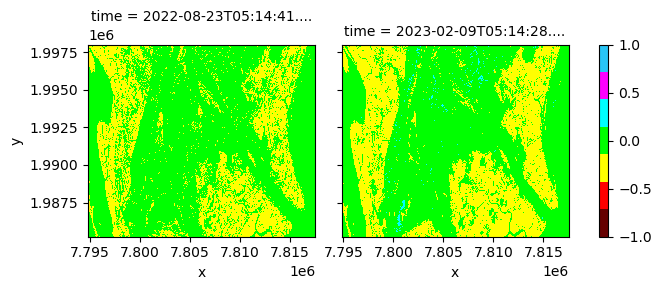

In [11]:
plt.figure(figsize=(8, 8))
lst_cmap = colors.ListedColormap(['#660000', '#FF0000', '#FFFF00', '#00FF00', '#00FFFF', '#FF00FF', '#29C5F6'])
bsi.plot(col='time', cmap = lst_cmap, vmin=-1, vmax=1, col_wrap=2)
plt.show()